## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Defining Headers

In [2]:
ratings_header = "UserID::MovieID::Rating::Timestamp".split("::")
users_header = "UserID::Gender::Age::Occupation::Zip-code".split("::")
movies_header = "MovieID::Title::Genres".split("::")

## Printing Headers

In [3]:
print(ratings_header)
print(users_header)
print(movies_header)

['UserID', 'MovieID', 'Rating', 'Timestamp']
['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
['MovieID', 'Title', 'Genres']


## Step 1 -  Importing the data

In [4]:
movies = pd.read_csv("movies.dat", sep="::", names = movies_header)
users = pd.read_csv("users.dat", sep="::", names = users_header)
ratings = pd.read_csv("ratings.dat", sep="::", names = ratings_header,parse_dates=["Timestamp"])

C:\Users\harma\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\harma\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\harma\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from th

## Exploring the data

In [5]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


## Merging the dataset

In [8]:
movie_and_ratings = pd.merge(movies,ratings,on="MovieID")

## Exploring the merged dataset

In [9]:
movie_and_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


## Step 2 - Merging the dataset into [Master_Data]

In [10]:
Master_Data = pd.merge(movie_and_ratings,users,on = "UserID")

## Exploring the merged dataset - Master_Data

In [11]:
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


## Checking for null values

In [12]:
Master_Data.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

## Step 3 - Visual Representation

### User Age Distribution

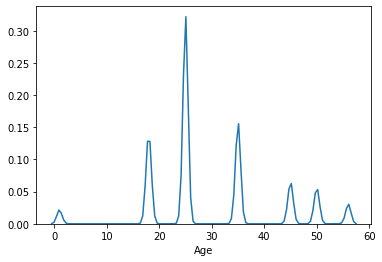

In [13]:
sns.distplot(Master_Data['Age'], hist=False)

#### Comment - User Age Distribution lies mostly 15 years to 60 years as we can observe from the graph

### User rating of the movie “Toy Story”

In [14]:
# Extracting the data needed from the dataset
toy_story = Master_Data[Master_Data["Title"] == "Toy Story (1995)"]

In [15]:
# Exploring the dataset
toy_story.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


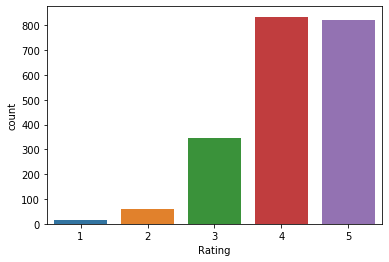

In [16]:
# Ploting the ratings of the toy story movie
sns.countplot("Rating", data = toy_story)

#### Comment - Most user have given either 4 or 5. Very few have given rating of either 1 or 2. There are many who have given a rating of 3 as well. Rating of 4 and 5 have a count of 800 while rating of 3 has a count of near to 400 and rating of 2 has close to 100 and rating of 1 is negligible

### Top 25 movies by viewership rating

In [17]:
# Sorting the dataset on ratings
sorted_rating = Master_Data.sort_values(by = 'Rating', ascending=False)

In [18]:
# Exploring the dataset
sorted_rating.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
489283,2858,American Beauty (1999),Comedy|Drama,5070,5,962466892,M,25,2,55344
489259,2599,Election (1999),Comedy,5070,5,962467931,M,25,2,55344
489257,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5070,5,962468500,M,25,2,55344
489256,2551,Dead Ringers (1988),Drama|Thriller,5070,5,963746449,M,25,2,55344


In [19]:
# Extracting the movie id and the title from the sorted data
movieid_and_title = sorted_rating[sorted_rating.columns[0:2]]

In [20]:
# Dropping duplicates
movieid_and_title.drop_duplicates(inplace=True)

C:\Users\harma\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# Extracting the top 25 movies
top_25 = movieid_and_title['Title'][:25]

In [22]:
# Reseting the index
top_25.reset_index(drop = True,inplace=True)

In [23]:
# Adding 1 to index so that index starts with 1 rather than 0
top_25.index += 1

In [24]:
print(top_25)

1                        Toy Story (1995)
2                  American Beauty (1999)
3                         Election (1999)
4                      Matrix, The (1999)
5                     Dead Ringers (1988)
6                         Rushmore (1998)
7                   Simple Plan, A (1998)
8             Hands on a Hard Body (1996)
9                    Pleasantville (1998)
10                 Say Anything... (1989)
11                     Beetlejuice (1988)
12                      Roger & Me (1989)
13                      Buffalo 66 (1998)
14                    Out of Sight (1998)
15                     I Went Down (1997)
16            Opposite of Sex, The (1998)
17               Good Will Hunting (1997)
18    Fast, Cheap & Out of Control (1997)
19               L.A. Confidential (1997)
20                         Contact (1997)
21             Grosse Pointe Blank (1997)
22       Run Lola Run (Lola rennt) (1998)
23                        Dog Park (1998)
24                 Raising Arizona

#### Comment - Above is the names of top 25 movies based on viewership rating.

#### Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [25]:
user_id_2696 = Master_Data[Master_Data["UserID"] == 2696][["Title", "Rating"]]

In [26]:
user_id_2696.reset_index(drop = True, inplace = True)
user_id_2696.index += 1
print(user_id_2696)

                                             Title  Rating
1                               Client, The (1994)       3
2                                 Lone Star (1996)       5
3                            Basic Instinct (1992)       4
4                E.T. the Extra-Terrestrial (1982)       3
5                              Shining, The (1980)       4
6                        Back to the Future (1985)       2
7                                  Cop Land (1997)       3
8                         L.A. Confidential (1997)       4
9                                 Game, The (1997)       4
10          I Know What You Did Last Summer (1997)       2
11                    Devil's Advocate, The (1997)       4
12  Midnight in the Garden of Good and Evil (1997)       4
13                                 Palmetto (1998)       4
14                              Wild Things (1998)       4
15                        Perfect Murder, A (1998)       4
16    I Still Know What You Did Last Summer (1998)      

#### Comment - Above are shown the names of the movie and their corresponding rating given by user id = 2696. Highest rating being of 5 and lowest of 1

## Feature Engineering

### Extracting unique genres

In [27]:
# Extracting genres from the dataset
genres = []
for i in Master_Data["Genres"]:
    temp = i.split("|")
    genres.extend(temp)


In [28]:
# Removing duplicate values 
unique_genres = list(set(genres))

In [29]:
# Printing the list of unique genres
print(unique_genres)

['War', 'Horror', 'Sci-Fi', 'Action', 'Thriller', 'Musical', 'Crime', 'Animation', 'Western', 'Adventure', 'Mystery', "Children's", 'Drama', 'Comedy', 'Romance', 'Documentary', 'Fantasy', 'Film-Noir']


### Create a separate column for each genre category with a one-hot encoding

In [30]:
# Performing one-hot encoding
for i in unique_genres:
    Master_Data[i] = Master_Data["Genres"].str.contains(i) * 1

In [31]:
# Exploring the data
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Western,Adventure,Mystery,Children's,Drama,Comedy,Romance,Documentary,Fantasy,Film-Noir
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,0,1,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,1,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,1,0,0,0,0,0,0,1,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,1,0,0,0,0,0


### Determine the features affecting the ratings of any particular movie.

In [32]:
# Label encoding the gender for calculating correlation
Master_Data["Gender"] = Master_Data.Gender.str.replace("F","1")
Master_Data["Gender"] = Master_Data.Gender.str.replace("M","0")
Master_Data["Gender"] = Master_Data.Gender.astype(int)

In [33]:
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Western,Adventure,Mystery,Children's,Drama,Comedy,Romance,Documentary,Fantasy,Film-Noir
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,0,0,1,0,0,1,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,1,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,1,0,0,0,0,0,0,1,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,1,0,0,0,0,0


In [34]:
# Dropping the genres from dataset as all categories are already included in dataset
Master_Data.drop(['Genres'],inplace=True,axis=1)
Master_Data.head()

,MovieID,Title,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,War,...,Western,Adventure,Mystery,Children's,Drama,Comedy,Romance,Documentary,Fantasy,Film-Noir
0,1,Toy Story (1995),1,5,978824268,1,1,10,48067,0,...,0,0,0,1,0,1,0,0,0,0
1,48,Pocahontas (1995),1,5,978824351,1,1,10,48067,0,...,0,0,0,1,0,0,1,0,0,0
2,150,Apollo 13 (1995),1,5,978301777,1,1,10,48067,0,...,0,0,0,0,1,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,978300760,1,1,10,48067,0,...,0,1,0,0,0,0,0,0,1,0
4,527,Schindler's List (1993),1,5,978824195,1,1,10,48067,1,...,0,0,0,0,1,0,0,0,0,0


In [35]:
# Label encoding age as the prvious values were not consistent
le =  LabelEncoder()
Master_Data['Age'] = le.fit_transform(Master_Data['Age'])
Master_Data['Age'].unique()

array([0, 5, 2, 3, 1, 4, 6], dtype=int64)

In [36]:
# Label encoding MovieID as the prvious values were not consistent
Master_Data["MovieID"] = le.fit_transform(Master_Data['MovieID'])
Master_Data['MovieID'].unique()

array([   0,   47,  144, ..., 1735, 3536, 1654], dtype=int64)

In [37]:
corrMatrix = Master_Data[["Age","Gender", "Occupation"]].corr()

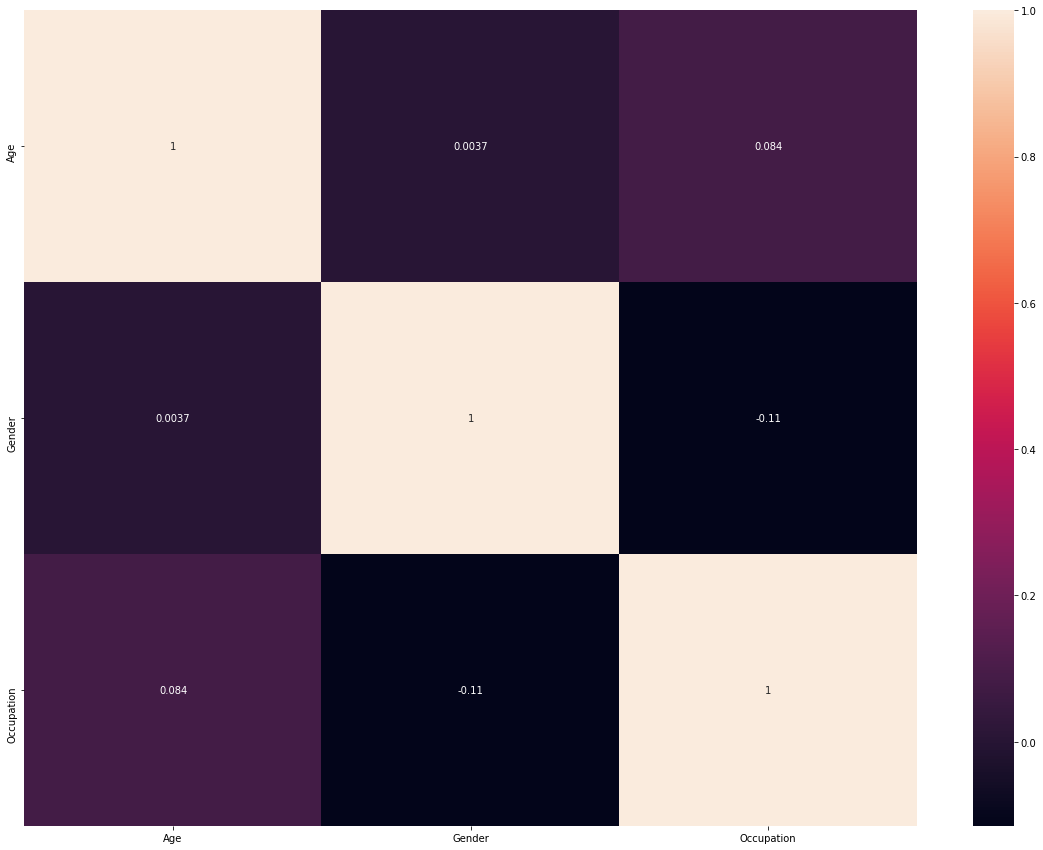

In [38]:
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True)

#### Above we see perfect correlation between diagonal elements because they are being matched with themselves. Here we see Age and Gender are positively correleated but the correlation is very weak. Same could be said for the correlation between Age and Occupation. There is a weak negative correlation between Occupation and gender

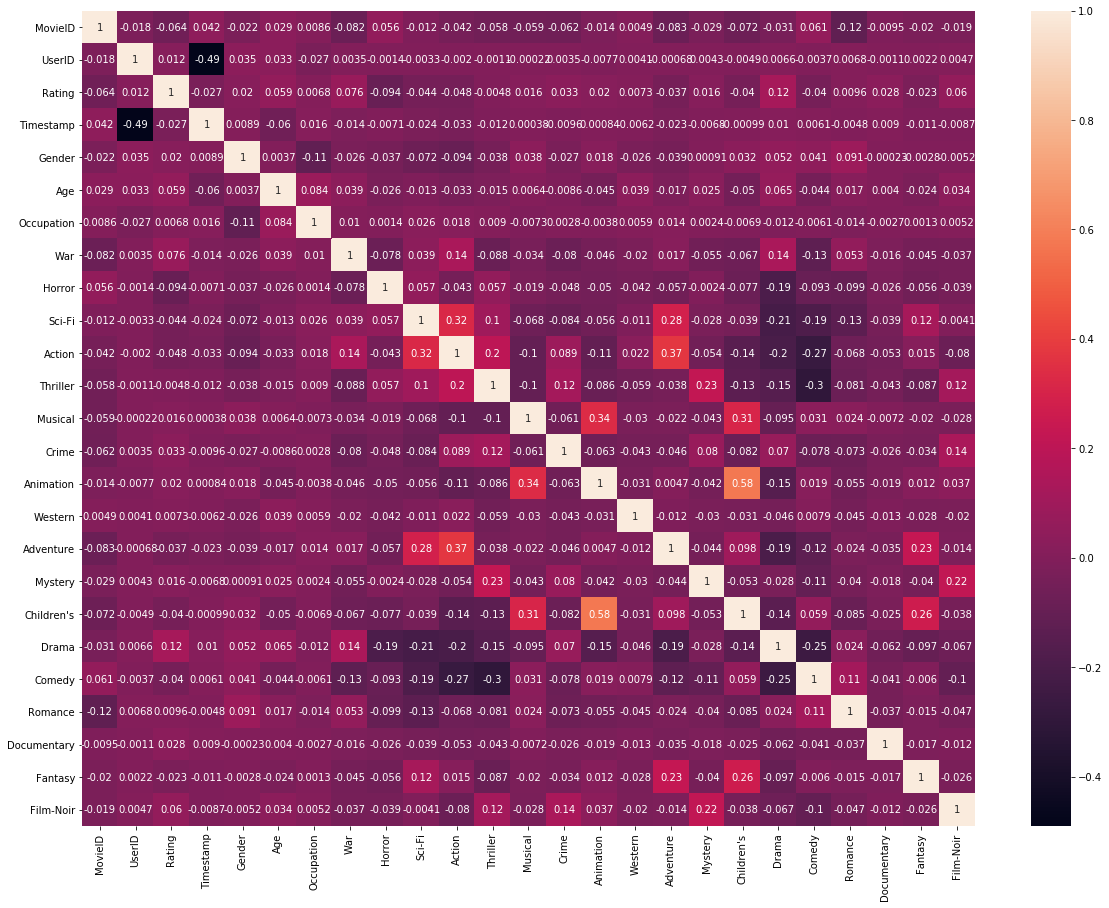

In [39]:
corrMatrix_1 = Master_Data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix_1, annot=True)

#### Above we see many correlations.

### Develop an appropriate model to predict the movie ratings

In [40]:
## Dropping columns which are not needed for model building
Master_Data.drop(['UserID','Zip-code','Timestamp','Title'],inplace=True,axis=1)

In [41]:
# Exploring the data
Master_Data.head()

,MovieID,Rating,Gender,Age,Occupation,War,Horror,Sci-Fi,Action,Thriller,...,Western,Adventure,Mystery,Children's,Drama,Comedy,Romance,Documentary,Fantasy,Film-Noir
0,0,5,1,0,10,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,47,5,1,0,10,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,144,5,1,0,10,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,253,4,1,0,10,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
4,513,5,1,0,10,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
# Checking the columns of the dataset
Master_Data.columns

Index(['MovieID', 'Rating', 'Gender', 'Age', 'Occupation', 'War', 'Horror',
       'Sci-Fi', 'Action', 'Thriller', 'Musical', 'Crime', 'Animation',
       'Western', 'Adventure', 'Mystery', 'Children's', 'Drama', 'Comedy',
       'Romance', 'Documentary', 'Fantasy', 'Film-Noir'],
      dtype='object')

In [43]:
# Defining input and target variable for the model
x_input = Master_Data[['MovieID', 'Gender', 'Age', 'Occupation', 'Romance',
       'Musical', 'Action', 'Documentary', 'Adventure', 'Drama', 'Thriller',
       'Animation', "Children\'s", 'Horror', 'War', 'Fantasy', 'Mystery',
       'Sci-Fi', 'Crime', 'Film-Noir', 'Comedy', 'Western']]
y_target = Master_Data['Rating']

In [44]:
x_input.head()

,MovieID,Gender,Age,Occupation,Romance,Musical,Action,Documentary,Adventure,Drama,...,Children's,Horror,War,Fantasy,Mystery,Sci-Fi,Crime,Film-Noir,Comedy,Western
0,0,1,0,10,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,47,1,0,10,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,144,1,0,10,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,253,1,0,10,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,513,1,0,10,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [45]:
#Splitting of data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

### Logistic Regression model

In [46]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
y_pred_logreg = logReg.predict(x_test)

C:\Users\harma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
accuracy_score(y_test, y_pred_logreg)

0.34523481022023333

### Decision Tree model

In [49]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred_decision_tree)

0.3402638640608191

### Random Forest model

In [56]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred_randforest = random_forest.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred_randforest)

0.3526652349701863